In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from collections import Counter
import matplotlib.pyplot as plt

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

In [ ]:
df = pd.read_csv('./data/IMDB Dataset.csv')
print(f"Shape: {df.shape}")
print(f"Sentiment: {df['sentiment'].value_counts().to_dict()}")

Shape: (50000, 2)
Sentiment: {'positive': 25000, 'negative': 25000}


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join(text.split())

df['tokens'] = df['review'].apply(clean_text).apply(nltk.word_tokenize)
df['token_count'] = df['tokens'].apply(len)
print(df['token_count'].describe())

count    50000.000000
mean       226.332880
std        167.689951
min          4.000000
25%        124.000000
50%        170.000000
75%        275.000000
max       2450.000000
Name: token_count, dtype: float64


In [ ]:
train_tokens = [token for tokens in df['tokens'][:25000] for token in tokens]
vocab = Counter(train_tokens)
print(f"Vocab size: {len(vocab)}")
print(f"Total tokens: {len(train_tokens)}")
print(f"Top 10: {vocab.most_common(10)}")

Vocab size: 144024
Total tokens: 5663146
Top 10: [('the', 325581), ('and', 160149), ('a', 159635), ('of', 144217), ('to', 133218), ('is', 105787), ('in', 91627), ('it', 75572), ('this', 73087), ('i', 72188)]


In [ ]:
top_10k = sum(dict(vocab.most_common(10000)).values())
print(f"Top 10k coverage: {(top_10k / len(train_tokens) * 100):.2f}%")

Top 10k coverage: 92.92%


In [ ]:
for seq_len in [25, 50, 100]:
    n = (df['token_count'] <= seq_len).sum()
    print(f"Seq {seq_len}: {(n / len(df) * 100):.1f}% ({n}/{len(df)})")

Seq 25: 0.1% (68/50000)
Seq 50: 2.7% (1329/50000)
Seq 100: 13.1% (6568/50000)


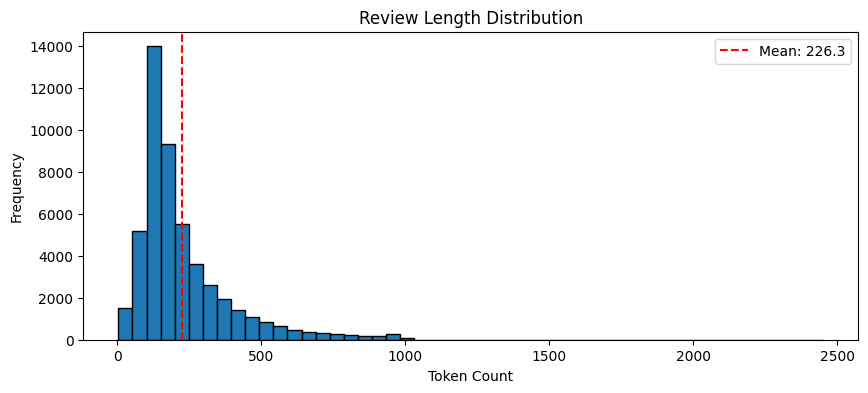

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['token_count'], bins=50, edgecolor='black')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Review Length Distribution')
plt.axvline(df['token_count'].mean(), color='r', linestyle='--', label=f"Mean: {df['token_count'].mean():.1f}")
plt.legend()
plt.show()